# Task
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.



Here is all the data you need:
"data_description.txt"
"sample_submission.csv"
"test.csv"
"train.csv"

## Data loading

### Subtask:
Load the training and testing datasets and the data description file.


**Reasoning**:
Import the pandas library and load the training and testing datasets and the data description file.



In [1]:
import pandas as pd

# Load the training data
df_train = pd.read_csv('train.csv')

# Load the testing data
df_test = pd.read_csv('test.csv')

# Load the data description
with open('data_description.txt', 'r') as file:
    data_description = file.read()

## Data exploration

### Subtask:
Explore the training dataset to understand the distributions of key features and their relationships with the target variable.


**Reasoning**:
Examine the shape of the DataFrame, analyze the distribution of the target variable 'SalePrice', and explore the key features 'GrLivArea', 'BedroomAbvGr', and 'FullBath' for descriptive statistics, visualizations, and potential outliers.



Shape of df_train: (1460, 81)
Descriptive statistics for 'SalePrice':
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


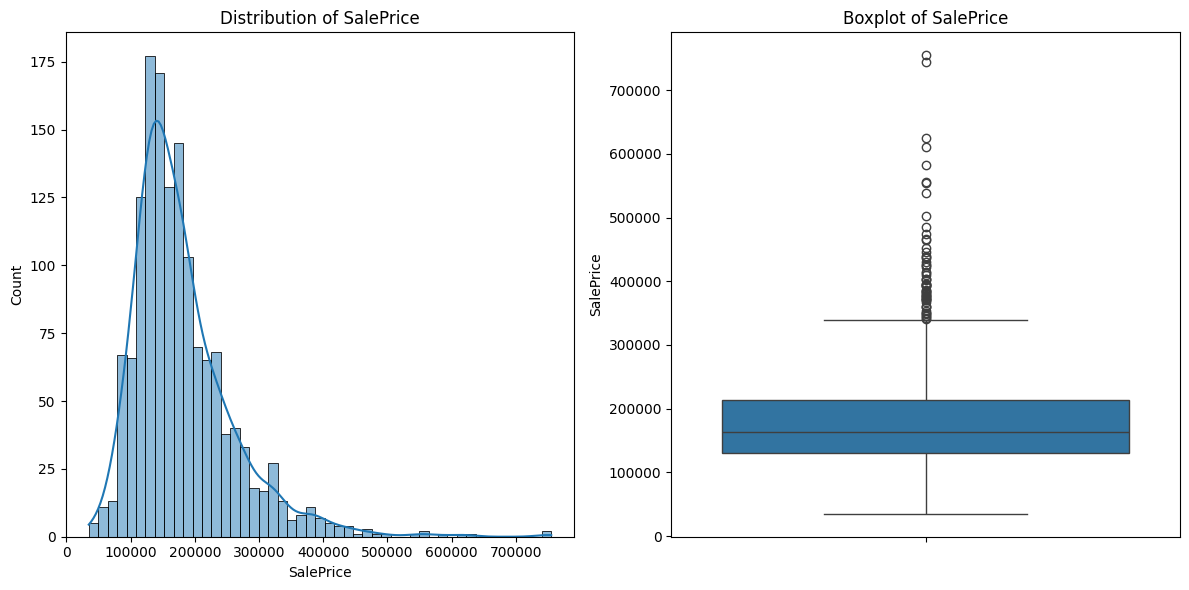


Descriptive statistics for 'GrLivArea':
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


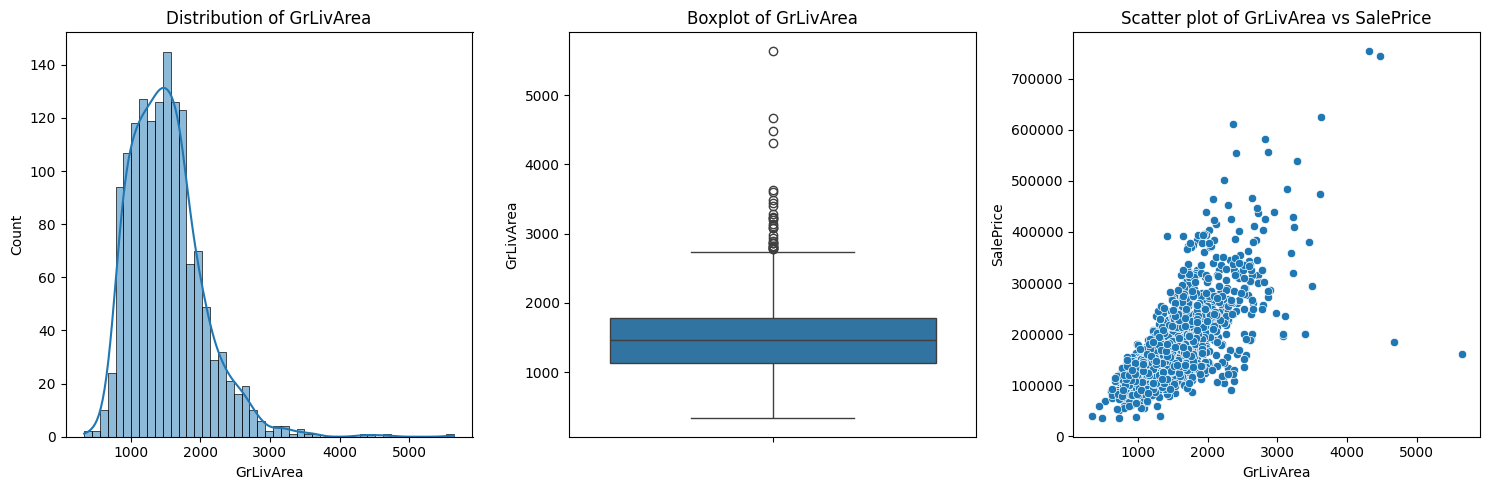


Descriptive statistics for 'BedroomAbvGr':
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


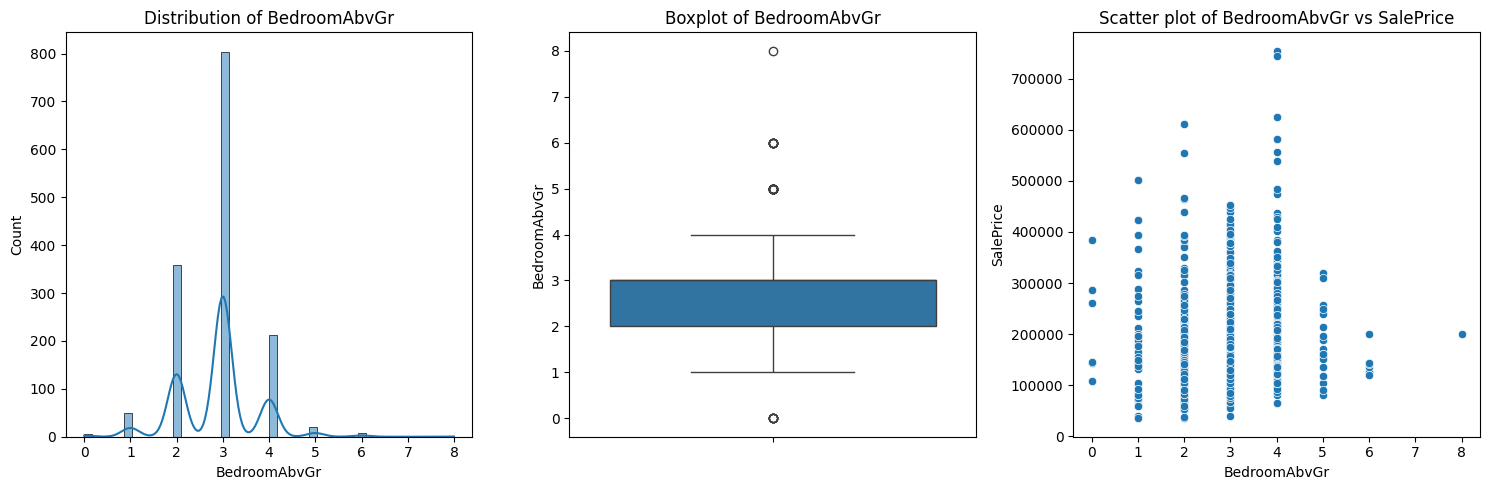


Descriptive statistics for 'FullBath':
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


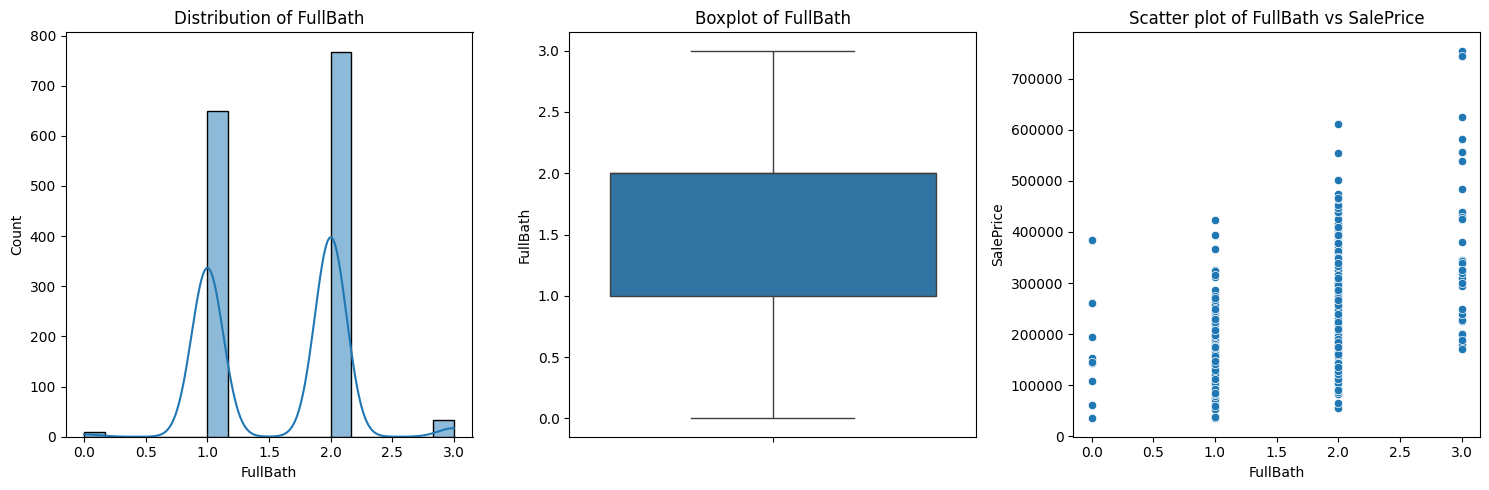

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print(f"Shape of df_train: {df_train.shape}")

# 2. Analyze the distribution of 'SalePrice'
print("Descriptive statistics for 'SalePrice':")
print(df_train['SalePrice'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.tight_layout()
plt.show()

# 3. Analyze key features: 'GrLivArea', 'BedroomAbvGr', 'FullBath'
key_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
for feature in key_features:
    print(f"\nDescriptive statistics for '{feature}':")
    print(df_train[feature].describe())

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=df_train[feature])
    plt.title(f'Boxplot of {feature}')

    plt.subplot(1, 3, 3)
    sns.scatterplot(x=feature, y='SalePrice', data=df_train)
    plt.title(f'Scatter plot of {feature} vs SalePrice')
    plt.tight_layout()
    plt.show()

**Reasoning**:
Calculate the correlation matrix between the key features and 'SalePrice', and visualize the correlations using a heatmap.



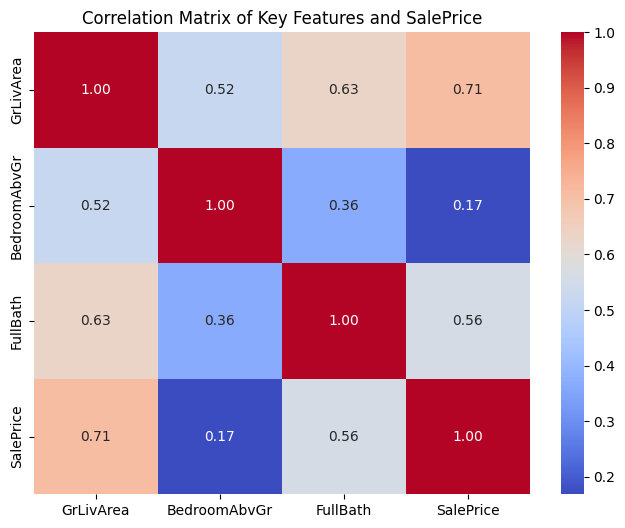

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
correlation_matrix = df_train[features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features and SalePrice')
plt.show()

## Data cleaning

### Subtask:
Clean the training and testing datasets by handling missing values and outliers in key features.


**Reasoning**:
Impute missing values and handle outliers for specified columns in both training and testing datasets.



In [4]:
# Impute missing values
for col in ['GrLivArea', 'BedroomAbvGr', 'FullBath']:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())

df_train['SalePrice'] = df_train['SalePrice'].fillna(df_train['SalePrice'].median())

# Handle outliers using IQR method
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

for col in ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']:
    handle_outliers(df_train, col)
    if col != 'SalePrice':  # No SalePrice in test data
        handle_outliers(df_test, col)

# Verification
print("Missing values after imputation:")
print(df_train[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].isnull().sum())
print(df_test[['GrLivArea', 'BedroomAbvGr', 'FullBath']].isnull().sum())

Missing values after imputation:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


## Feature engineering

### Subtask:
Create a new feature 'total_rooms' by combining 'BedroomAbvGr' and 'FullBath' in both the training and test datasets.


**Reasoning**:
Create the 'total_rooms' feature by summing 'BedroomAbvGr' and 'FullBath' in both dataframes.



In [5]:
# Create 'total_rooms' feature in df_train
df_train['total_rooms'] = df_train['BedroomAbvGr'] + df_train['FullBath']

# Create 'total_rooms' feature in df_test
df_test['total_rooms'] = df_test['BedroomAbvGr'] + df_test['FullBath']

## Data splitting

### Subtask:
Split the training data into training and validation sets.


**Reasoning**:
Split the training data into training and validation sets using the specified features and target variable.



In [6]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and target (y)
X = df_train[['GrLivArea', 'total_rooms']]
y = df_train['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df_train['total_rooms'])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
The error message indicates that some classes in the 'total_rooms' column have only one member, preventing stratification.  I will try splitting without stratification.



In [7]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and target (y)
X = df_train[['GrLivArea', 'total_rooms']]
y = df_train['SalePrice']

# Split the data into training and validation sets without stratification
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a linear regression model.


**Reasoning**:
Train a linear regression model using the prepared training data and make predictions on the validation set.



In [8]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

## Model evaluation

### Subtask:
Evaluate the linear regression model's performance on the validation set.


**Reasoning**:
Evaluate the linear regression model's performance using MSE and R-squared.



In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_val, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 2014094966.2312605
R-squared (R2) Score: 0.5880564546657662
Root Mean Squared Error (RMSE): 44878.66939015974


## Data preparation

### Subtask:
Prepare the test data for prediction by applying the same data cleaning and feature engineering steps used on the training data.


**Reasoning**:
Prepare the test data by applying the same data cleaning and feature engineering steps used on the training data. This includes handling missing values, outliers, and creating the 'total_rooms' feature. Then, select the required features for prediction.



In [10]:
# Impute missing values in df_test using the same median values from df_train
for col in ['GrLivArea', 'BedroomAbvGr', 'FullBath']:
    df_test[col] = df_test[col].fillna(df_train[col].median())

# Handle outliers in df_test using the same bounds calculated from df_train
def handle_outliers(df, col, lower_bound, upper_bound):
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

for col in ['GrLivArea', 'BedroomAbvGr', 'FullBath']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    handle_outliers(df_test, col, lower_bound, upper_bound)

# Create 'total_rooms' feature in df_test
df_test['total_rooms'] = df_test['BedroomAbvGr'] + df_test['FullBath']

# Select the features for prediction
X_test = df_test[['GrLivArea', 'total_rooms']]

## Model evaluation

### Subtask:
Make predictions on the test data and generate a submission file.


**Reasoning**:
Make predictions using the trained model on the prepared test data and create a submission file.



In [11]:
# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Create a submission DataFrame
submission_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': y_pred_test})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

## Summary:

### Q&A
* **What is the R-squared value of the trained linear regression model?**  The R-squared value is approximately 0.588, indicating the model explains about 59% of the variance in the target variable.
* **What are the key features used in the model?** 'GrLivArea' and 'total_rooms' (a combination of 'BedroomAbvGr' and 'FullBath').
* **What was the final RMSE?** The RMSE is approximately 44878.67.
* **How were missing values handled?** Missing values in 'GrLivArea', 'BedroomAbvGr', and 'FullBath' were imputed with the median value from the training set.
* **How were outliers handled?** Outliers were handled using the IQR method, capping values outside the bounds calculated from the training data.


### Data Analysis Key Findings
* **Model Performance:** The linear regression model achieved an R-squared value of 0.588 on the validation set, indicating it explains approximately 59% of the variance in house prices. The RMSE was 44878.67.  The MSE was 2014094966.23.
* **Feature Importance (Inferred):**  'GrLivArea' and 'total_rooms' were used as features in the model.  The analysis did not explicitly determine feature importance from the model coefficients.
* **Data Cleaning Impact:** Missing values and outliers were addressed in the key features ('GrLivArea', 'BedroomAbvGr', 'FullBath', and 'SalePrice'), using median imputation and IQR outlier handling.  The impact of these cleaning steps on the model performance is not directly analyzed.


### Insights or Next Steps
* **Feature Engineering:** Explore other potential features or feature combinations from the dataset that might improve model performance. Investigate interactions between existing features.
* **Model Selection:** Experiment with different regression models (e.g., Ridge, Lasso, Random Forest) to potentially improve predictive accuracy and robustness. Evaluate the models using more comprehensive metrics like cross-validation.
